<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Ameer, my name is Dmitrii. Happy to review your project! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
- Overall well done! I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
    
    
- However, there are some comments/areas left to fix that will help you to make your project even better:
    - Formulate hypotheses (null/alternative) for each question. 
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

I will wait for you to send me a new version of the project :)

    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- Hello Ameer, thank you for making corrections and improvements in your project.
- Now no critical issues left (only minor comment about relative difference graph) , so your project has been accepted! 
- To learn further about A/B testing, I can recommend the following articles:
  - https://towardsdatascience.com/a-collection-of-a-b-testing-learning-resources-newbie-to-master-6bab1e0d7845 or this cool book "Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing"

Please keep up the great work and good luck on the next project! 
  
</div>

# Part I
I am an analyst at a big online store. Together with the marketing department, we've compiled a list of hypotheses that may help boost the revenue.
We need to prioritize these hypotheses, using the datasets we have which include the **Reach, Impact, Confidence and Effort** of each hypotheses.

# Part II
After we're done with prioritizing hypotheses, we are going to launch an A/B test on a dataset that includes information about the store users that were initially divided into two groups, **A and B** for comparsion and analyze the results.

# Plan Of Work
* First of all we are going to load the data, have a general look at it.
* Second, we'll start optimizing the data in-order to save us some running time.
* Third, It is time for preprocessing, removing or correcting any problematic data.
* Forth, Enhace and improve our dataframes and make sure that it is ready to be worked with.
* Fifth, We'll start studying the information and data that we have in hand
* Finally, reach to conclusions and share our conjectures.


## Part  I. Prioritizing Hypotheses

### Loading the data
First we start by loading the libraries that we may need and then loading our csv files into dataframes.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added additional information about project tasks. It gives an overview of what you are going to achieve in this project.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [2]:
hypos = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
pd.set_option('display.max_colwidth', None) # In order to be able to see the whole hyposthesis column
hypos # have a look at the data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [3]:
hypos.info() # Check what we are up against

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


The dataframe is very small, there'll be no need for optimizing. Besides, we can tell by looking at the DF that there's no problematic values/data. This means that we're good to move on.

**Next:** We are going to prioritize our hypotheses using the ICE A/K/A **(Impact, Confidence and Effort)** method.

### Calculating ICE and RICE
ICE = **(Impact** x **Confidence)** / **Effort**

In [4]:
# creating a new column called ICE to store the ICE values in it
hypos['ICE'] = np.floor((hypos['Impact']*hypos['Confidence'])/hypos['Effort']*100)/100
# the use of np.floor here was to end up with two decimals only
hypos

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20


**Next:** we are going to prioritize the hypotheses using the RICE A.K.A **(Reach, Impact, Confidence and Effort)** method. Which is very similar to ICE but this method also considers the **Reach** of each hypotheses (How big is the audience it can reach).

RICE = **(Reach** x **Confidence** x **Impact)** / **Effort**

In [5]:
# same stuff as the previous code block
hypos['RICE'] = np.floor((hypos['Reach']*hypos['Impact']*hypos['Confidence'])/hypos['Effort']*100)/100
hypos

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2


### ICE vs RICE
In order to prioritize a hypotheses and to choose one method, we have to see which method gives better prioritizing for our case. Therefore, we should sort the **hypos** according to both ICE and RICE and compare the results:

In [6]:
display(hypos.sort_values('ICE', ascending=False).head(5))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0


**VS**

In [7]:
display(hypos.sort_values('RICE', ascending=False).head(5))

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2


### Conclusion

We can clearly see that the data is sorted differently in each method, that's obviously due to having the **Reach** in the second sorting method. Hypotheses with higher **Reach** tend to go higher in the list of method 2 than in the first sorting method.

I think that the **RICE** method is more precise and I would choose it for prioritizing over the ICE method, since the **Reach** can be important in so many cases. Therefore, If we are to prioritize one hypothesis for now, we would prioritize the hypothesis at the top of the RICE-sorted-list because not only it has high **Reach** but also high **Impact and Confidence** (Unlike the top of the ICE-sorted-list which has low **Reach**).

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. You correctly applied both `ICE` & `RICE` frameworks. And based on the results, it is clear now what is the impact of the reach factor on overall value.
    
Additionally, a scatter plot could be used to map all numbers per hypothesis to compare them.

Now that we're done with prioritizng hypotheses, we should move into conducting the A/B test analysis

## Part II. A/B Test Analysis

### Loading the data
Just like we did earlier, we are going to load the libraries and datasets that are necessary for part 2 and then move on from that.

In [8]:
# loading the two datasets
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [9]:
display(orders.head(6))
display(visits.head(9))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617


### Optimizing the dataframes
we don't see any problematic data initially, but before we move on and digg deeper for the problematic data, lets optimize our data first.

In [10]:
# checking the info of each DF to see which types need to be convereted
orders.info(memory_usage='deep')
print(' ___________________________________ ')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB
 ___________________________________ 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB


We notice that some types here can be converted to save memory. **group** into **category** and **date** into **pd_datetime**:

In [11]:
# converting strings into datatime/category
orders['date'] = pd.to_datetime(orders['date'])
orders['group'] = orders['group'].astype('category')
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.9 KB


In [12]:
# converting strings into datatime/category
visits['date'] = pd.to_datetime(visits['date'],dayfirst=True)
visits['group'] = visits['group'].astype('category')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.4 KB


By simple steps we were able to scale our dataframes so much, this way we save memory and time.

Now that we're done with optimzing, we move on to **preprocessing**

### Preprocessing
Lets start by checking for missing values:

In [13]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

We have 0 missing values, Great!

Lets make sure that we only have **A** and **B** categories as stated in the instructions:

In [14]:
print(orders['group'].value_counts(),'\n\n',visits['group'].value_counts())

B    640
A    557
Name: group, dtype: int64 

 A    31
B    31
Name: group, dtype: int64


We indeed have only **A** and **B** as groups/categories. What also comes to mind is, does all users belong to one group? Having users that belong to both groups doesn't help us and we need to get rid of their data:

In [15]:
# dividing users
a_group = orders.query('group == "A"')
b_group = orders.query('group == "B"')
# inner merging the two groups on user id to get users that belong to both groups
both_groups = pd.merge(a_group, b_group, how = 'inner', on = ['visitorId'])

bad_list = both_groups['visitorId']
full_orders = orders.copy() # saving a copy of the original orders DF
orders = orders[~orders['visitorId'].isin(bad_list)] # if a user id is in the badlist we created earlier
# then this user belong to both groups and should be removed.

orders.info()
print('')
full_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 40.8 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   categ

We actually had users that belonged to both groups **A** and **B**. After removing them we are left with a dataframe that includes only users that belong to one group.

One last check to make sure that our data is good for studying is the revenue column in **orders** and the visits column in **visits**, lets make sure that all the rows make sense:

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Great, that you identified these users. Indeed, having the same users in both groups contradicts the whole idea of A/B test.

In [16]:
orders['revenue'].describe()

count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

In [17]:
visits['visits'].describe()

count     62.000000
mean     607.290323
std      114.400560
min      361.000000
25%      534.000000
50%      624.500000
75%      710.500000
max      770.000000
Name: visits, dtype: float64

No missing values and no negative values. The data seem to be good and clean, finally.

### Test Begins

#### Cumulative revenue
We'll start by **calculating the cumulative revenue for each group**, this way we can see how much revenue each group was generating every day and how much was accumlated at the end of the month.

In [18]:
# dividing the groups again after we cleaned the dfs
a_group = orders.query('group == "A"').sort_values('date')
b_group = orders.query('group == "B"').sort_values('date')
#raw_b = raw_b.sample(n=468).sort_values('date')

# grouping by the date to calculate the cumulative revenue later
a_grouped_date = a_group.groupby('date')['revenue'].sum().reset_index()
b_grouped_date = b_group.groupby('date')['revenue'].sum().reset_index()

In [19]:
# calculating the cumulative revenue
a_grouped_date['cum_revenue'] = a_grouped_date['revenue'].cumsum()
b_grouped_date['cum_revenue'] = b_grouped_date['revenue'].cumsum()
display(a_grouped_date.tail())
display(b_grouped_date.tail())

,date,revenue,cum_revenue
26,2019-08-27,2934.7,46539.0
27,2019-08-28,1526.9,48065.9
28,2019-08-29,3068.9,51134.8
29,2019-08-30,1228.9,52363.7
30,2019-08-31,848.3,53212.0


,date,revenue,cum_revenue
26,2019-08-27,1746.9,71885.0
27,2019-08-28,1010.5,72895.5
28,2019-08-29,1681.2,74576.7
29,2019-08-30,3286.8,77863.5
30,2019-08-31,1787.7,79651.2


**Appearently, group B did better than group A. Lets see why:**

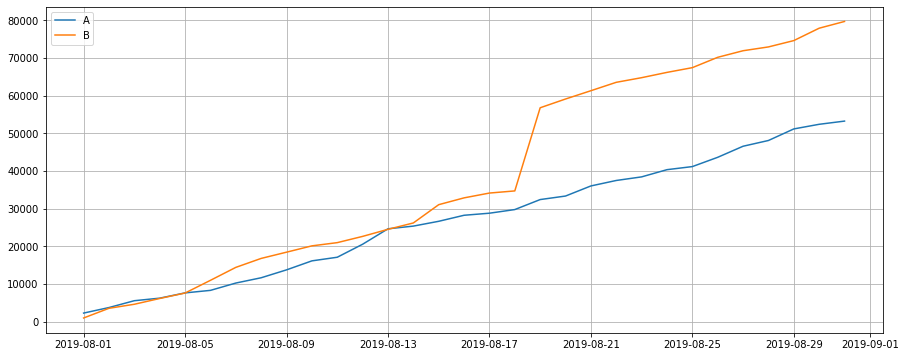

In [20]:
# drawing a graph to see more precisely how group B beat group A
plt.rcParams["figure.figsize"] = (15,6)
plt.plot(a_grouped_date['date'], a_grouped_date['cum_revenue'], label='A')
plt.plot(b_grouped_date['date'], b_grouped_date['cum_revenue'], label='B')
plt.legend()
plt.grid()

What we missed by looking at the last 5 rows of each DF's cumulative revenue was the jump that B made between August 17th and August 21st. Meaning: B beat A due to one day, could be a day full of orders or it could simply be a normal day that had one abnormally large order. To find out we need to continue investigating.

**Next:** We'll calculate the **cumulative average order size by group**. This will give us more insight about the situation.
#### Cumulative average order size

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Very nice data visualization.

It is a matter of taste, but you can also use `plt.grid()` to add grid to your graph and rotate x-axis ticks.
    
In order not to show auxiliary python outputs like "matplotlib.axes._subplots.AxesSubplot at 0x7f5feaf7fc90 ', you can add a semicolon or plt.show () at the end of the line.
    
<div class="alert alert-info"> <b>Student comments:</b> 
    Yep, looks much better!</div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
🙌

In [21]:
# below we'll create a second groupby df by date with transcation counts and revenue sum
a_grouped_date_nd = a_group.groupby('date').agg({'visitorId':'count','revenue':'sum'}).reset_index()
b_grouped_date_nd = b_group.groupby('date').agg({'visitorId':'count','revenue':'sum'}).reset_index()

a_grouped_date_nd.columns = ['date', 'total_orders', 'revenue']
b_grouped_date_nd.columns = ['date', 'total_orders', 'revenue']

In [22]:
# calculating cumulative revenue again
a_grouped_date_nd['cum_revenue'] = a_grouped_date_nd['revenue'].cumsum()
b_grouped_date_nd['cum_revenue'] = b_grouped_date_nd['revenue'].cumsum()

In [23]:
# calculating cumulate orders
a_grouped_date_nd['cum_orders'] = a_grouped_date_nd['total_orders'].cumsum()
b_grouped_date_nd['cum_orders'] = b_grouped_date_nd['total_orders'].cumsum()

In [24]:
# calculating avg order size
a_grouped_date_nd['cum_avg_size'] = a_grouped_date_nd['cum_revenue']/a_grouped_date_nd['cum_orders']
b_grouped_date_nd['cum_avg_size'] = b_grouped_date_nd['cum_revenue']/b_grouped_date_nd['cum_orders']
display(a_grouped_date_nd.tail(8))
display(b_grouped_date_nd.tail(8))

,date,total_orders,revenue,cum_revenue,cum_orders,cum_avg_size
23,2019-08-24,13,1912.1,40321.3,372,108.390591
24,2019-08-25,8,818.2,41139.5,380,108.261842
25,2019-08-26,16,2464.8,43604.3,396,110.111869
26,2019-08-27,23,2934.7,46539.0,419,111.071599
27,2019-08-28,15,1526.9,48065.9,434,110.750922
28,2019-08-29,17,3068.9,51134.8,451,113.380931
29,2019-08-30,9,1228.9,52363.7,460,113.834130
30,2019-08-31,8,848.3,53212.0,468,113.700855


,date,total_orders,revenue,cum_revenue,cum_orders,cum_avg_size
23,2019-08-24,14,1405.7,66138.5,428,154.529206
24,2019-08-25,12,1255.3,67393.8,440,153.167727
25,2019-08-26,22,2744.3,70138.1,462,151.814069
26,2019-08-27,11,1746.9,71885.0,473,151.976744
27,2019-08-28,22,1010.5,72895.5,495,147.263636
28,2019-08-29,15,1681.2,74576.7,510,146.228824
29,2019-08-30,21,3286.8,77863.5,531,146.635593
30,2019-08-31,17,1787.7,79651.2,548,145.348905


Looking at the last 8 rows of each group DF, we don't see anything suspecious. Everything seems to be fine. Lets have a look a graph describing our data:

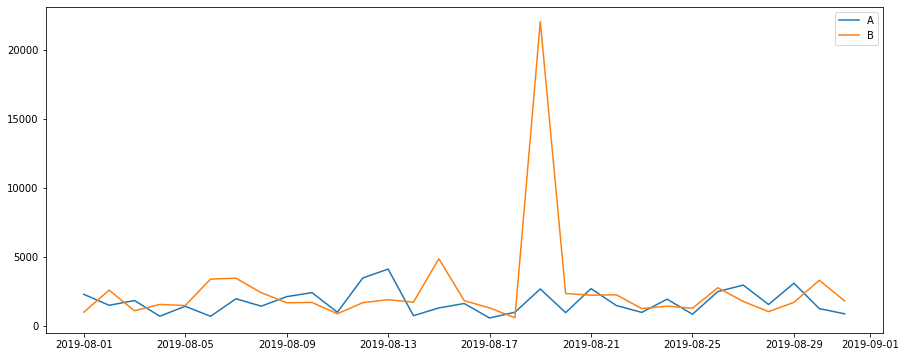

In [25]:
plt.plot(a_grouped_date_nd['date'], a_grouped_date_nd['revenue'], label='A')
plt.plot(b_grouped_date_nd['date'], b_grouped_date_nd['revenue'], label='B')
plt.legend()

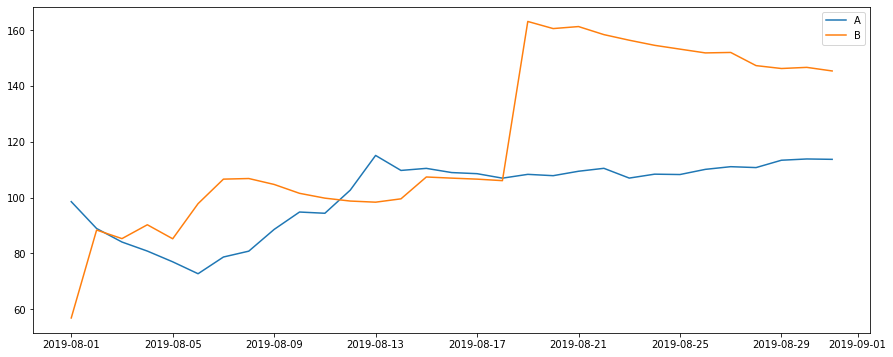

In [26]:
plt.plot(a_grouped_date_nd['date'], a_grouped_date_nd['cum_avg_size'], label='A')
plt.plot(b_grouped_date_nd['date'], b_grouped_date_nd['cum_avg_size'], label='B')
plt.legend()

Alright, seems like we figured this out. Looking at the revenue by date graph, we can see that between August 17th and August 21st there was a massive spike in revenue. Looking at the average order size, we can see that at the same dates we have a massive spike as well.

Average order size was calculated with **Revenue/Orders Count** formula, now since both graphs showed a spike at these dates then that means that the **orders count** didn't change alot or increase massively because if it did then we wouldn't be able to see the spike in the order size graph (if the numerator grew massively [**revenue**] and the value of [**revenue/orders count**] grew massively then that means that the denominator [**orders count**] didn't grow as much or stayed the same). What this suggests is that we had some massive outliers during these dates.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Once again everything is correct here.

**To continue our study:** we are going to show a graph of the relative difference in cumulative average order size for group B compared with group A:

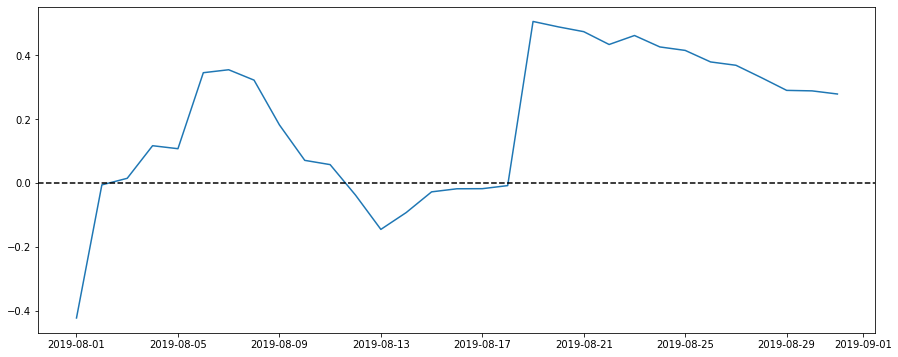

In [27]:
relative_cumul_av_purch_ba = (b_grouped_date_nd['cum_avg_size'] / a_grouped_date_nd['cum_avg_size']) - 1
plt.plot(b_grouped_date_nd['date'], relative_cumul_av_purch_ba)
plt.axhline(y=0, color='black', linestyle='--')

The relative difference of the groups means how different were values from each others during the testing period. A relative difference of 0 means that the values weren't different. We can see that at the beginning the relative difference wasn't very stable but then it slowly stabilized reaching 0 twice until the August the 18th were the relative difference grew bigger and stayed that way till the end of the test period.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed, it could be helpful to study data without outliers. Also, interesting to note that difference has been stabilized in the last couple of days.

#### Conversion rates

We'll calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Then plot the daily conversion rates of the two groups and describe the difference.

In [28]:
# dividing visits into two groups
visits_a = visits.query('group == "A"')
visits_b = visits.query('group == "B"')
visits_b.reset_index(drop=True, inplace=True)
display(visits_a.tail(6))
display(visits_b.tail(9))

,date,group,visits
25,2019-08-26,A,722
26,2019-08-27,A,711
27,2019-08-28,A,594
28,2019-08-29,A,577
29,2019-08-30,A,490
30,2019-08-31,A,699


,date,group,visits
22,2019-08-23,B,546
23,2019-08-24,B,378
24,2019-08-25,B,679
25,2019-08-26,B,676
26,2019-08-27,B,720
27,2019-08-28,B,654
28,2019-08-29,B,531
29,2019-08-30,B,490
30,2019-08-31,B,718


In [29]:
# mergings orders with visits to have all data in one table
a_grouped_date_nd = pd.merge(a_grouped_date_nd, visits_a, how = 'inner', on = ['date'])
b_grouped_date_nd = pd.merge(b_grouped_date_nd, visits_b, how = 'inner', on = ['date'])

In [30]:
display(a_grouped_date_nd.head())
display(b_grouped_date_nd.head())

,date,total_orders,revenue,cum_revenue,cum_orders,cum_avg_size,group,visits
0,2019-08-01,23,2266.6,2266.6,23,98.547826,A,719
1,2019-08-02,19,1468.3,3734.9,42,88.926190,A,619
2,2019-08-03,24,1815.2,5550.1,66,84.092424,A,507
3,2019-08-04,11,675.5,6225.6,77,80.851948,A,717
4,2019-08-05,22,1398.0,7623.6,99,77.006061,A,756


,date,total_orders,revenue,cum_revenue,cum_orders,cum_avg_size,group,visits
0,2019-08-01,17,967.2,967.2,17,56.894118,B,713
1,2019-08-02,23,2568.1,3535.3,40,88.382500,B,581
2,2019-08-03,14,1071.6,4606.9,54,85.312963,B,509
3,2019-08-04,14,1531.6,6138.5,68,90.272059,B,770
4,2019-08-05,21,1449.3,7587.8,89,85.256180,B,707


In [31]:
# calculating the conversion rate
a_grouped_date_nd['conversion'] = a_grouped_date_nd['total_orders'] / a_grouped_date_nd['visits']
b_grouped_date_nd['conversion'] = b_grouped_date_nd['total_orders'] / b_grouped_date_nd['visits']
display(a_grouped_date_nd.sample(n=6))
display(b_grouped_date_nd.sample(n=9))

,date,total_orders,revenue,cum_revenue,cum_orders,cum_avg_size,group,visits,conversion
22,2019-08-23,20,954.1,38409.2,359,106.989415,A,468,0.042735
16,2019-08-17,6,548.5,28770.1,265,108.566415,A,412,0.014563
6,2019-08-07,16,1942.0,10234.0,130,78.723077,A,644,0.024845
17,2019-08-18,13,965.6,29735.7,278,106.962950,A,668,0.019461
19,2019-08-20,10,936.0,33325.3,309,107.848867,A,575,0.017391
24,2019-08-25,8,818.2,41139.5,380,108.261842,A,621,0.012882


,date,total_orders,revenue,cum_revenue,cum_orders,cum_avg_size,group,visits,conversion
23,2019-08-24,14,1405.7,66138.5,428,154.529206,B,378,0.037037
11,2019-08-12,19,1657.8,22616.8,229,98.763319,B,543,0.034991
1,2019-08-02,23,2568.1,3535.3,40,88.382500,B,581,0.039587
7,2019-08-08,22,2379.9,16772.6,157,106.831847,B,654,0.033639
13,2019-08-14,14,1692.4,26183.7,263,99.557795,B,746,0.018767
24,2019-08-25,12,1255.3,67393.8,440,153.167727,B,679,0.017673
26,2019-08-27,11,1746.9,71885.0,473,151.976744,B,720,0.015278
4,2019-08-05,21,1449.3,7587.8,89,85.256180,B,707,0.029703
16,2019-08-17,13,1276.0,34116.2,320,106.613125,B,421,0.030879


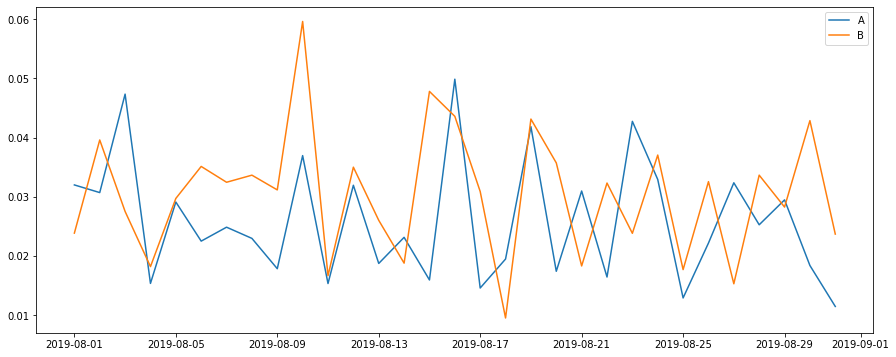

In [32]:
plt.plot(a_grouped_date_nd['date'], a_grouped_date_nd['conversion'], label='A')
plt.plot(b_grouped_date_nd['date'], b_grouped_date_nd['conversion'], label='B')
plt.legend()
plt.show()

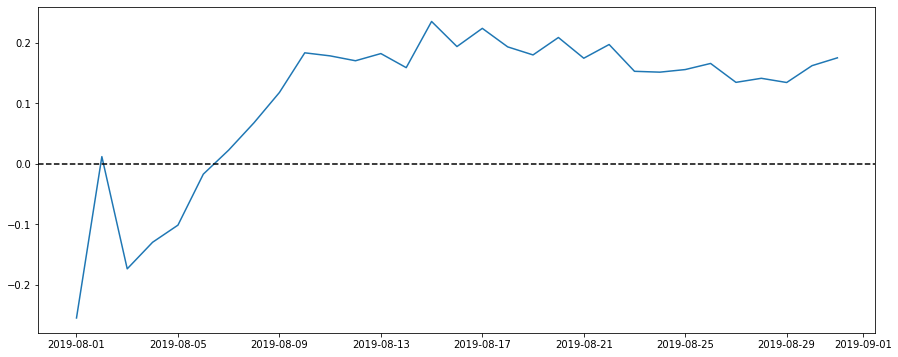

In [33]:
a_grouped_date_nd['cum_conversion'] = a_grouped_date_nd['conversion'].cumsum()
b_grouped_date_nd['cum_conversion'] = b_grouped_date_nd['conversion'].cumsum()

relative_cumul_conv_ba = (b_grouped_date_nd['cum_conversion'] / a_grouped_date_nd['cum_conversion']) - 1
plt.plot(b_grouped_date_nd['date'], relative_cumul_conv_ba)
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Thanks for adding that. I think with this it is more easier to say that Group B is indeed doing better.

In [34]:
# overall conversion
print('A group overall conversion:')
display(a_grouped_date_nd['total_orders'].sum()/a_grouped_date_nd['visits'].sum())
print('B group overall conversion:')
display(b_grouped_date_nd['total_orders'].sum()/b_grouped_date_nd['visits'].sum())

A group overall conversion:


0.02497865072587532

B group overall conversion:


0.02897018397124128

Judging by the graph and the overall conversion rates, we can say that group B had a higher conversion rate (16% relatively higher than group A).

**Next:** we are going to study the number of orders per user in order to check for outliers out there that may have disturbed our results up until now.

#### #Orders per user

In [35]:
# grouping orders by visitorId to find out how much orders each user had
orders_grouped = orders.groupby('visitorId').agg({'transactionId' : 'count'}).reset_index()
orders_grouped.columns = ['users', 'orders']
orders_grouped.sample(n=9)

,users,orders
842,3659263677,1
591,2592727107,1
696,3024988998,1
217,938079215,1
51,236764260,1
819,3573155649,1
948,4171878080,1
469,2067508917,1
523,2283224496,1


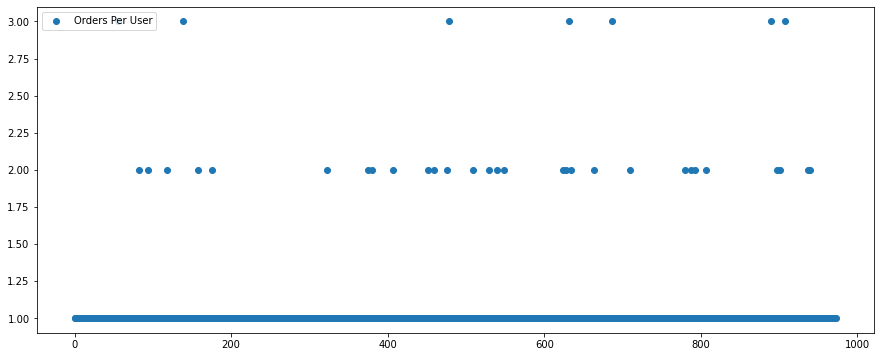

In [36]:
x_values = pd.Series(range(0,len(orders_grouped)))
plt.scatter(x_values, orders_grouped['orders'], label='Orders Per User')
plt.legend()
plt.show()

**We've had very few users order 3 times while the majority ordered once or twice.**

Lets calculate the 95th and 99th percentiles for the number of orders per user to see where does our users stand

In [37]:
print(np.percentile(orders_grouped['orders'], [95, 99, 99.9])) 

[1. 2. 3.]


This means that less than 5% of our users have more than 1 order and less than 1% have more than 2 orders.
Looking at the graph, it is reasonable to keep users with 2 orders or less and consider users with more than 2 orders (the 0.1% of our users) as an anomaly.

We've calculated how many orders per user we had, but it is not enough. Next we'll calculate the revenue per order to look for more outliers since what we really considered as **outliers** in the previous section could be just normal orders and have zero disturbance to the results.

#### Revenue per order

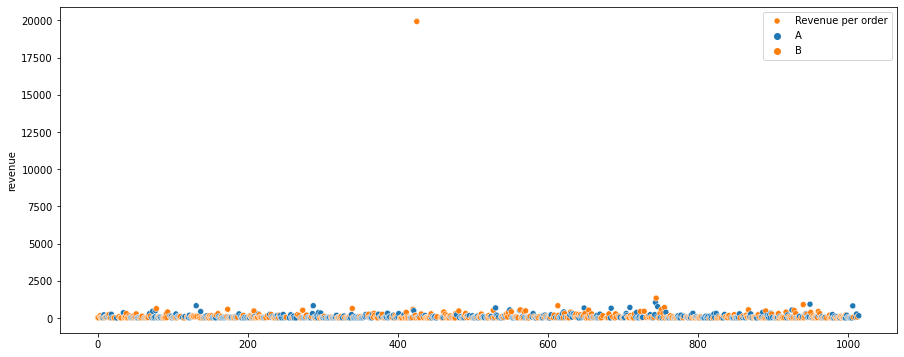

In [38]:
x_values = pd.Series(range(0,len(orders)))
sns.scatterplot(x = x_values, y = orders['revenue'], label='Revenue per order', hue=orders['group'])
plt.legend()
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)
    
 <div class="alert alert-info"> <b>Student comments:</b> 
    Thanks for comment, I know about this feature but I just didn't know how helpful it would be in this case since all dots are scattered in one dense area. But yeah, at least it helps us see where outliers belong!</div>  

**Here it is, we can clearly see the outliers here.** Lets find where the belong in our data and remove them.

In [39]:
print(np.percentile(orders['revenue'], [95, 99, 99.9])) 

[ 414.275   830.3    3094.6855]


This means that less than 5% of our orders are more than 414 dollars and less than 1% are more than 830 dollars. Looking at the graph, most of the orders generate from 0 to 2500$ in revenue thus it is reasonable to keep orders with revenues ranging from 0 to 2500 and consider everything else as an anomaly (Which is 0.1% according percentiles).

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You correctly identified 95th and 99th percentiles of order prices. Now you have a threshold and data could be filtered.

#### Statistical significance

Now that we've found the outliers, we'll calculate the statistical significance of the difference in conversion and in average order size between the groups using both the raw data (unfiltered) and the filtered data without the outliers.

We'll be testing the null hypotheses:
1. H0(1) = **there is no difference in conversion** between the groups A and B

   H1(1) = **there is difference in conversion** between the groups A and B
   
   
2. H0(2) = **there is no difference in average order size** between the groups A and B

   H1(2) = **there is difference in average order size** between the groups A and B

We'll be testing those hypothese twice, once on raw data and once on filtered data.

Rejecting the H0 means there's difference between the groups and for a high degree of certainty this difference is due to a change in our product and isn't just accedintal. Failing to reject the H0 means there might be difference between the groups but it's by chance.

##### Raw groups: conversion
Testing H0(1) on raw groups

In [40]:
def testing_average(sample1,sample2,alpha=0.05):
    #checking normality
    sample1=sample1.dropna()
    sample2=sample2.dropna()
    stat1, p1_norm=stats.shapiro(sample1)
    stat2, p2_norm=stats.shapiro(sample2)
    if p1_norm > alpha and p2_norm > alpha:
        #then both normal, perform t-test.
        #for t-test also should check the equality of variances
        statslev,p_levene=stats.levene(sample1, sample2)
        if p_levene<alpha:
           #variances are not equal
            statist, p_value = stats.ttest_ind(sample1, sample2,equal_var=False)
        else:
            statist, p_value = stats.ttest_ind(sample1, sample2,equal_var=True) 
    else:
        statist, p_value = stats.mannwhitneyu(sample1, sample2)
    print(p_value)
    if p_value < alpha:
        print('Reject H0')
    else:
        print('Fail to Reject H0')

We'll be using this function to test our hypotheses. The function perfroms a t-test or a Mann-Whitney U test according to the case. Why is that? because the Mann-Whitney U test is the nonparametric equivalent of the two sample t-test. While the t-test makes an assumption about the distribution of a population, the Mann Whitney U Test doesn't!

We'll be testing the populations with a 95% confidence level.

In [41]:
a_grouped_date_nd['conversion'] = a_grouped_date_nd['total_orders']/a_grouped_date_nd['visits']
b_grouped_date_nd['conversion'] = b_grouped_date_nd['total_orders']/b_grouped_date_nd['visits']

In [42]:
testing_average(a_grouped_date_nd['conversion'],b_grouped_date_nd['conversion'],alpha=0.05)

0.09573715593918651
Fail to Reject H0


##### Raw groups: average order size
Testing H0(2) on raw groups

In [43]:
a_grouped_date_nd['avg_ord_size'] = a_grouped_date_nd['revenue']/a_grouped_date_nd['total_orders']
b_grouped_date_nd['avg_ord_size'] = b_grouped_date_nd['revenue']/b_grouped_date_nd['total_orders']

In [44]:
testing_average(a_grouped_date_nd['avg_ord_size'],b_grouped_date_nd['avg_ord_size'],alpha=0.05)

0.9550914317372012
Fail to Reject H0


##### Filtering groups

In [45]:
# filtering the orders to have only orders with revenue below 2500
filtered_orders = orders.query('revenue < 2500')

In [46]:
# filtering the orders again to exclude users with 3 or more orders
bad_list2 = orders_grouped[orders_grouped['orders'] >= 3]['users']

In [47]:
filtered_orders = filtered_orders[~(filtered_orders['visitorId'].isin(bad_list2))]
filtered_orders.sample(n=6)

,transactionId,visitorId,date,revenue,group
306,1275337321,3043080596,2019-08-28,35.6,A
564,3649785329,1341752722,2019-08-26,20.2,B
946,210558688,2733145037,2019-08-21,55.2,A
441,2396420873,2171487014,2019-08-03,50.5,B
719,1676073049,2696599598,2019-08-05,15.6,A
13,3044797713,728063420,2019-08-15,185.4,B


Now that we have the filtered orders DF, we can define the **A** group and **B** group again and continue our research:

In [48]:
filt_a_group = filtered_orders.query('group == "A"').sort_values('date')
filt_b_group = filtered_orders.query('group == "B"').sort_values('date')
#raw_b = raw_b.sample(n=468).sort_values('date')

filt_a_grouped_date = filt_a_group.groupby('date').agg({'visitorId':'count','revenue':'sum'}).reset_index()
filt_b_grouped_date = filt_b_group.groupby('date').agg({'visitorId':'count','revenue':'sum'}).reset_index()

# chaning the column names
filt_a_grouped_date.columns = ['date', 'total_orders', 'revenue']
filt_b_grouped_date.columns = ['date', 'total_orders', 'revenue']

In [49]:
# just like we did before, merging with visits DF to have the visits column in our DF
filt_a_grouped_date = pd.merge(filt_a_grouped_date, visits_a, how = 'inner', on = ['date'])
filt_b_grouped_date = pd.merge(filt_b_grouped_date, visits_b, how = 'inner', on = ['date'])

filt_a_grouped_date['conversion'] = filt_a_grouped_date['total_orders']/filt_a_grouped_date['visits']
filt_b_grouped_date['conversion'] = filt_b_grouped_date['total_orders']/filt_b_grouped_date['visits']

**Before we move on to testing again, Lets have a look at the new graphs of the filtered data and see how much have they changed from the graphs of the raw data.**

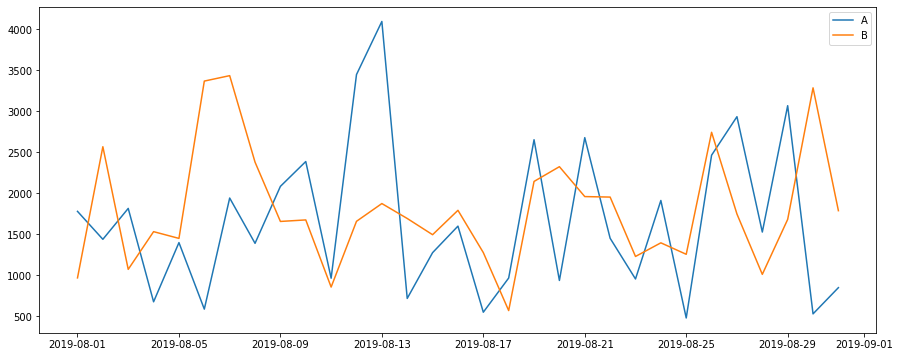

In [50]:
plt.plot(filt_a_grouped_date['date'], filt_a_grouped_date['revenue'], label='A')
plt.plot(filt_b_grouped_date['date'], filt_b_grouped_date['revenue'], label='B')
plt.legend()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v.1</b> 

Сould you please formulate a null hypothesis and an alternative hypothesis for each question before actual testing in the markdown box: 
    
    H0 (Null):
    
    H1 (Alternative):
    
Additionally could you please elaborate on overall results and why you used this test?
    
<div class="alert alert-info"> <b>Student comments:</b> 
    Thanks for the comment, I added the H0 and H1 formulations at the top and then used the  symbols at each test to make clear of what we're testing at each point.

I also elaborted a bit of why we used this test and updated my overall results. I hope its correct and you like it.</div> 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Great job! Hypotheses have been formulated and tested correctly. 
I know, it could be annoying but it really helps to structure your conclusions and avoid mistakes.

->

**Graph describing the conversion rates for each group:**

->

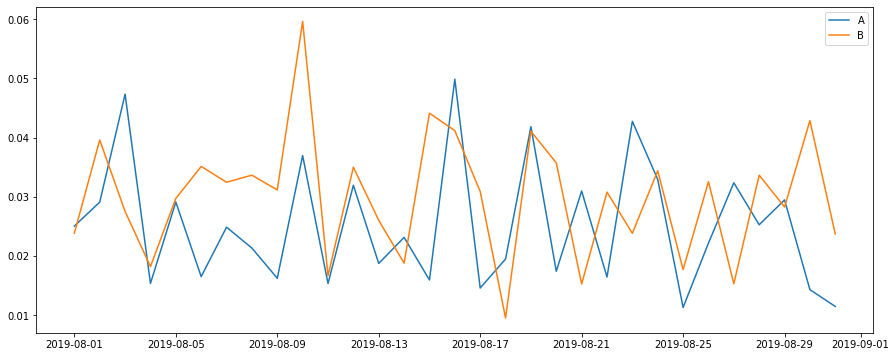

In [51]:
plt.plot(filt_a_grouped_date['date'], filt_a_grouped_date['conversion'], label='A')
plt.plot(filt_b_grouped_date['date'], filt_b_grouped_date['conversion'], label='B')
plt.legend()

->

**Graph describing the relative difference between cumulative conversion rates for each group**

->

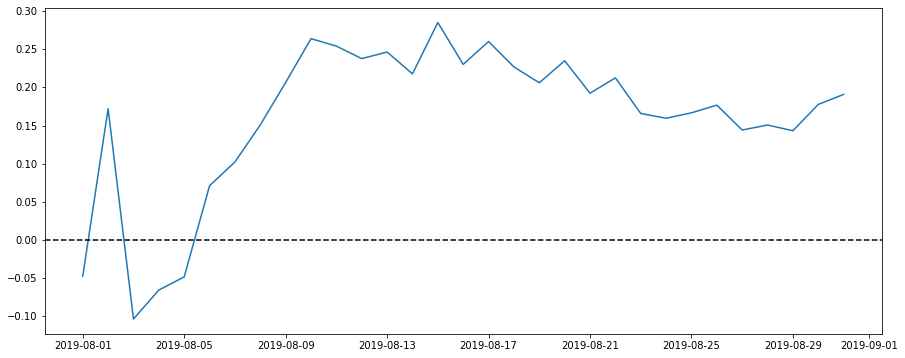

In [52]:
filt_a_grouped_date['cum_conversion'] = filt_a_grouped_date['conversion'].cumsum()
filt_b_grouped_date['cum_conversion'] = filt_b_grouped_date['conversion'].cumsum()

f_relative_cumul_conv_ba = (filt_b_grouped_date['cum_conversion'] / filt_a_grouped_date['cum_conversion']) - 1
plt.plot(filt_b_grouped_date['date'], f_relative_cumul_conv_ba)
plt.axhline(y=0, color='black', linestyle='--')

In [53]:
# overall conversion
print('A group overall conversion:')
display(filt_a_grouped_date['total_orders'].sum()/filt_a_grouped_date['visits'].sum())
print('B group overall conversion:')
display(filt_b_grouped_date['total_orders'].sum()/filt_b_grouped_date['visits'].sum())

A group overall conversion:


0.02417805294619983

B group overall conversion:


0.028547261577500527

We can say that the conversion rate of the group B is still higher than the conversion rate of group A even when we removed the outliers from the  groups.

##### Filtered groups: conversion
Testing H0(1) on filtered groups

In [54]:
testing_average(filt_a_grouped_date['conversion'],filt_b_grouped_date['conversion'],alpha=0.05)

0.04713291665843557
Reject H0


##### Filtered groups: average order size
Testing H0(2) on fiiltered groups

In [55]:
filt_a_grouped_date['avg_ord_size'] = filt_a_grouped_date['revenue']/filt_a_grouped_date['total_orders']
filt_b_grouped_date['avg_ord_size'] = filt_b_grouped_date['revenue']/filt_b_grouped_date['total_orders']

In [56]:
testing_average(filt_a_grouped_date['avg_ord_size'],filt_b_grouped_date['avg_ord_size'],alpha=0.05)

0.8327479062272571
Fail to Reject H0


##### Summary

We've tested 2 hypotheses, the difference of **conversion and average order size** in raw data, and their difference in filtered and clean data.

- Test(1.1) is the test on difference of conversion in raw data.
- Test(1.2) is the test on difference of average order size in raw data.
- Test(2.1) is the test on difference of conversion in filtered data.
- Test(2.2) is the test on difference of average order size in filtered data.


* Test(1.1) failed to reject the null hypothesis, meaning that conversion might've had changes across the groups but this change isn't certain to be due to a change in our product but rather it is an accidental change. Test(1.2) had similar results implying the same idea.


* In the other hand, Test(2.1) rejected the H0. That means that the changes that happened were due to a change in our product and we're more certain now that the increase of 16% in conversion in group B wasn't accidental and we can expect it to happen again and again in every test.


* Test(2.2) failed to reject the H0, there wasn't change in average order size in both groups so this is very reasonable.


* What we can conclude from all of this is that the difference between conversion between the filtered groups was statistically significant. 

## General Summary

This project was divided into 2 parts, in the **first part** we prioritized hypotheses according to **RICE** and **ICE** methods. We got different prioritizations for each method due to the **reach** parameter that was calculated in the **RICE** method but was left out in the **ICE** method.

In my opinion, both **ICE** and **RICE** methods have their uses in the industry but I'd still rather be using **RICE** in most of the cases due to it having more parameters considered, especially that **reach** is usually a good parameter to be considered since it represents the range of **impact**, a parameter that is included in both methods. On the other hand, where **reach** isn't quite significant to our interests, then surely **ICE** is the way to go.

**Part II**

* We studied data about two groups of users on our online store, group A and group B. The data we were able to study was revenue, orders count, cumulative revenue, conversion rates etc. After analyizng the data and drawing graphs, we were able to conclude that group B had done better than group A in general during the whole period and during certain days as well. Later on we found out that group B performed better in certain days due to outliers, massive ones, which contributed to its success. Those outliers disturb our results so we had to remove them and see how all of this changes.

* After we filtered the data from outliers, group B still had a slight advantage in conversion rates while the advantage that it had earlier in revenue disappeared since it was due to outliers that we removed earlier. Then we tested 2 hypotheses on whether certain parameters had a statistical significance on our interests (statistical significance of the difference in conversion and in average order size) and in most of the tests the null hypothesis was failed to be rejected, meaning there was enough confidence that these parameters were impactless on our results, and the change (if there's any) was purely accidental. Except for one test, Test(2.1), the test of statistical significance of the difference in conversion on the filtered groups where the null hypothesis was rejected meaning that this parameters is of impact in our interests actually and any change that happened in the results was actually due to changes that we made to the product.

With the results that we got, we can actually stop the test and call it a success with 16% conversion rate increase for group B and a similar average order size on both groups. What I also suggest is to run the test again under the same conditions to double down on our results and really be confident of what we concluded in this test.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 

Great that you wrote about all important steps and findings in your project. 
 
And overall, you conducted great research with correct interim findings, clean code and nice visualization. I really like that you applied functions and your code has comments and good structure.
    
One comment about running the test is that we can mistakenly wait till the moment we get correct results (to face a peeking problem). 
    
You can check an article about it here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over

<div class="alert alert-info"> <b>Student comments:</b> 
   Thank you so much for your feedback. I appreciate the links that you sent me through your comments, learned much from them. I also changed the final decision after reading about the peeking problem and updated the conclusions slightly.</div> 


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Thank you very much for your feedback and glad that smth was usefull!